In [5]:
import cv2 as cv2
# import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
from jupyter_bbox_widget import BBoxWidget
mpl.rc("figure", dpi=300)


In [6]:
image = cv2.imread('./images/arif.jpg')
original = image.copy()



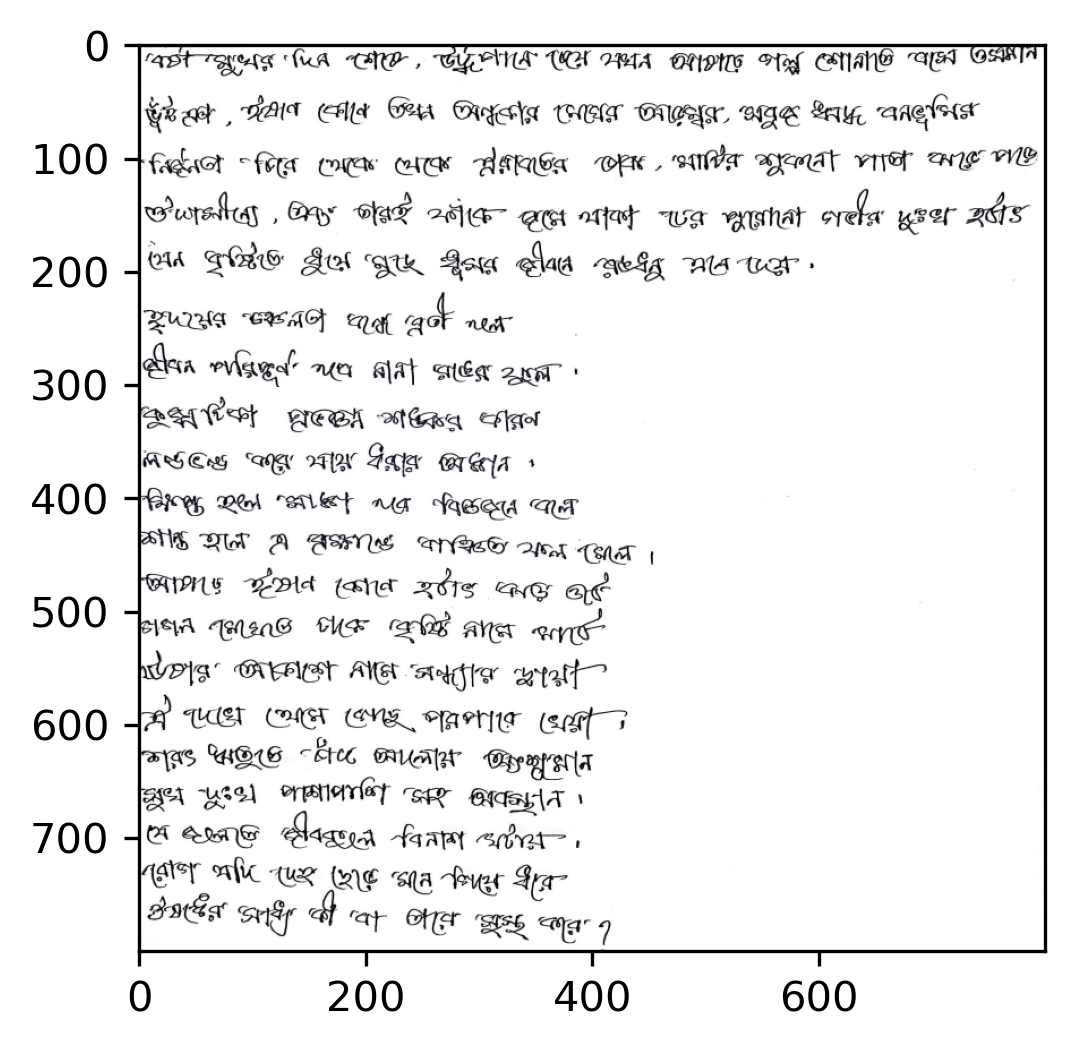

In [7]:
re_sized_img = cv2.resize(image, (800, 800), interpolation = cv2.INTER_AREA)
# re_sized_img=image
plt.imshow(re_sized_img)

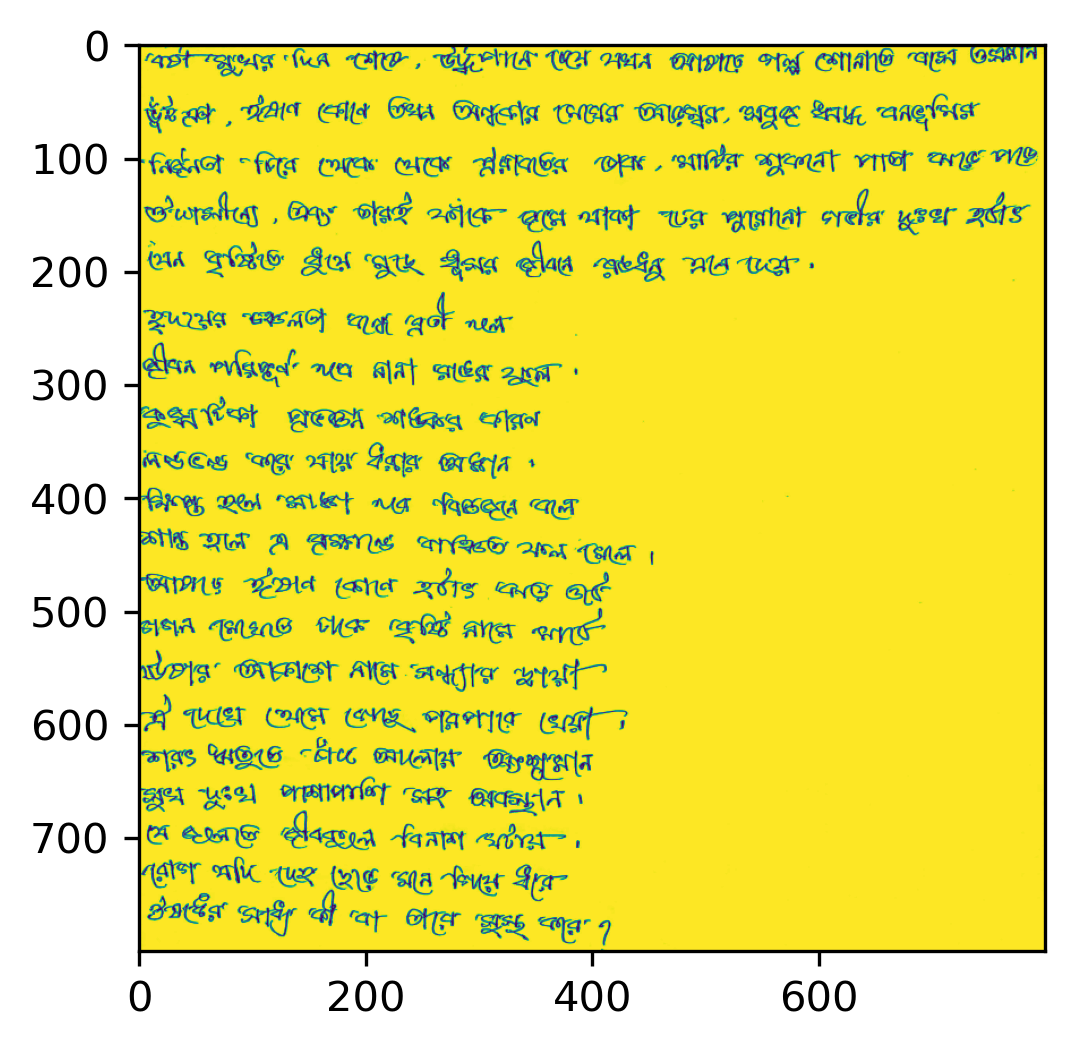

In [8]:
gray = cv2.cvtColor(re_sized_img, cv2.COLOR_BGR2GRAY)
# blur = cv2.GaussianBlur(gray,(5,15),0)
# print(sizeof(thresh))
# edges = cv2.Canny(gray,100,200)
plt.imshow(gray)

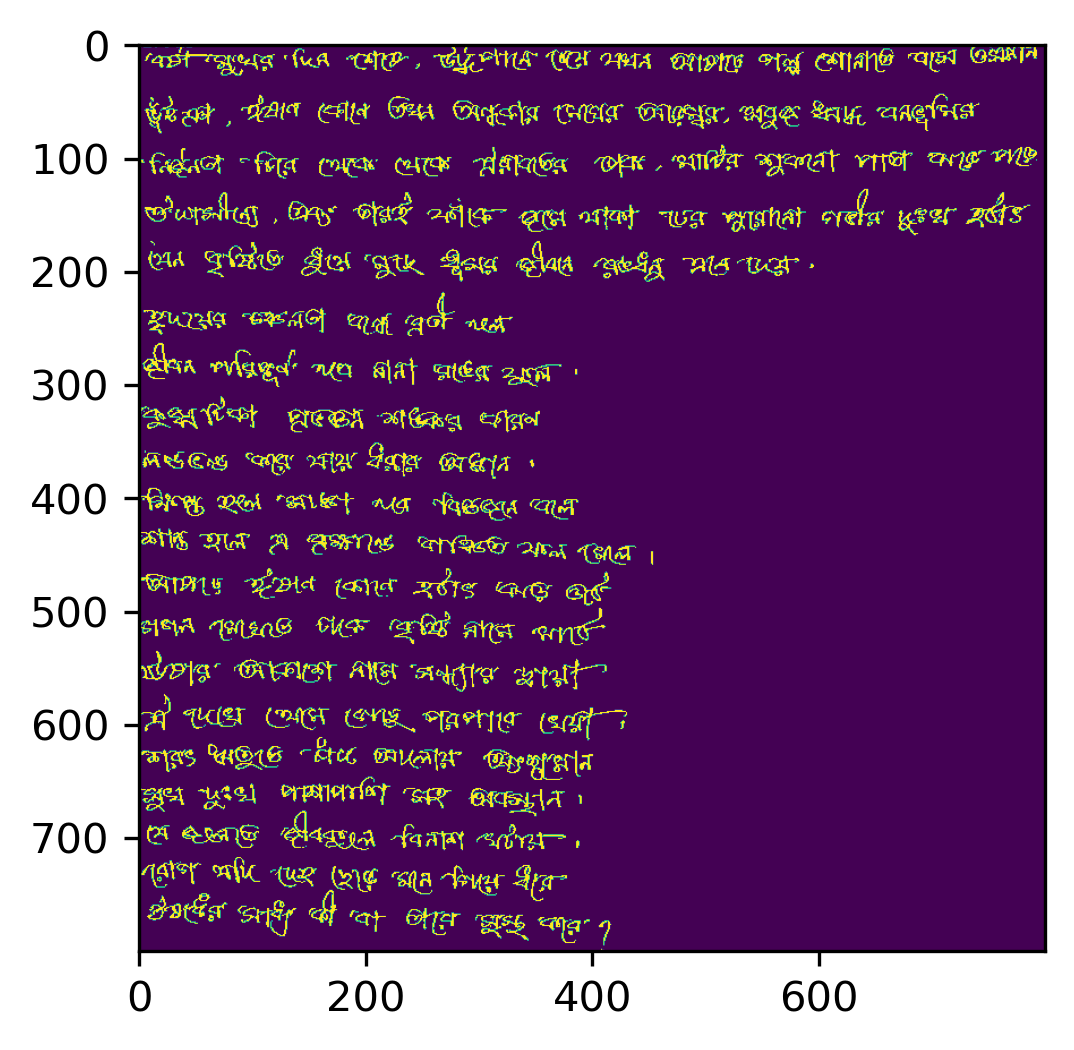

In [9]:
ret,thresh_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
# print(sizeof(thresh))
plt.imshow(thresh_img)

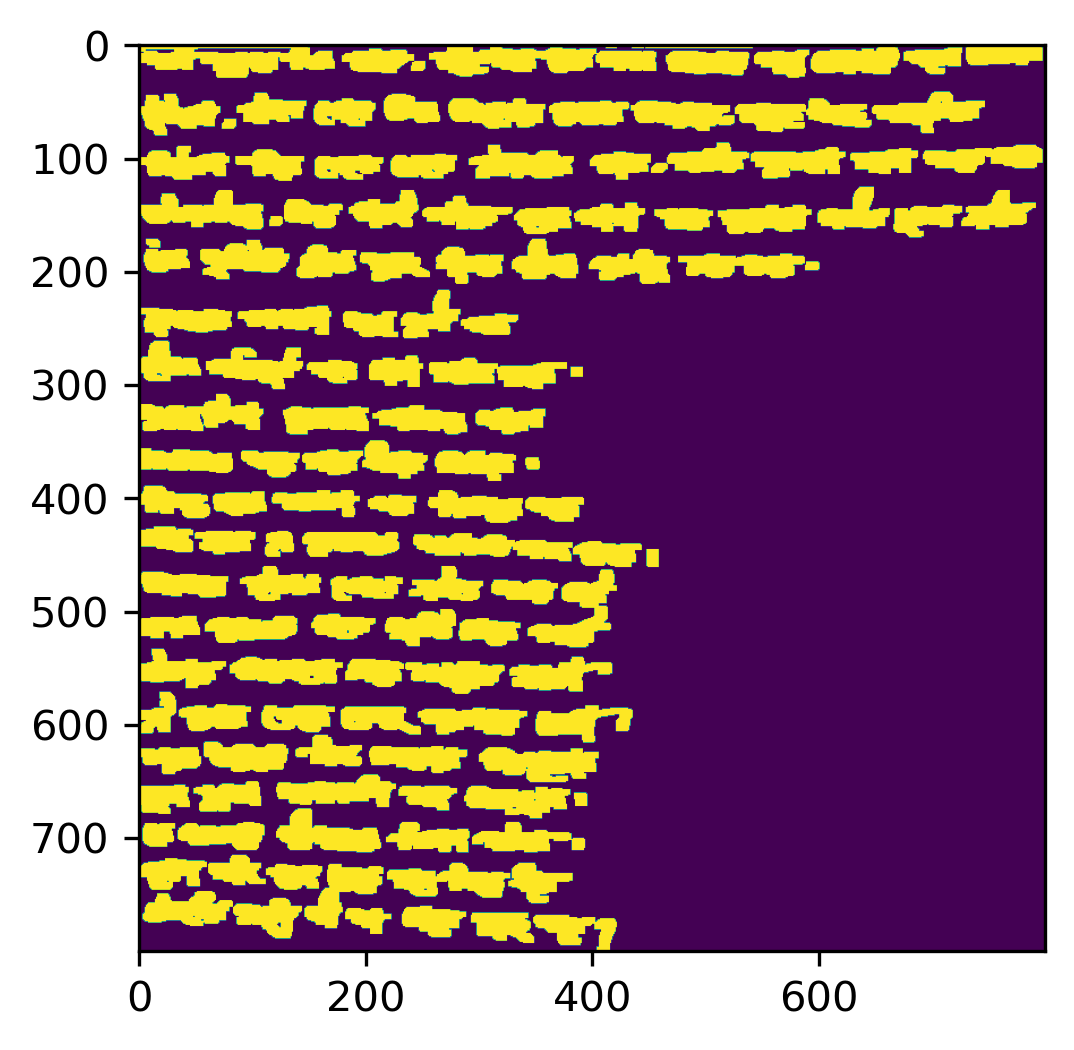

In [10]:
kernel = np.ones((5,10), np.uint8)
dilated = cv2.dilate(thresh_img, kernel, iterations = 1)
plt.imshow(dilated)

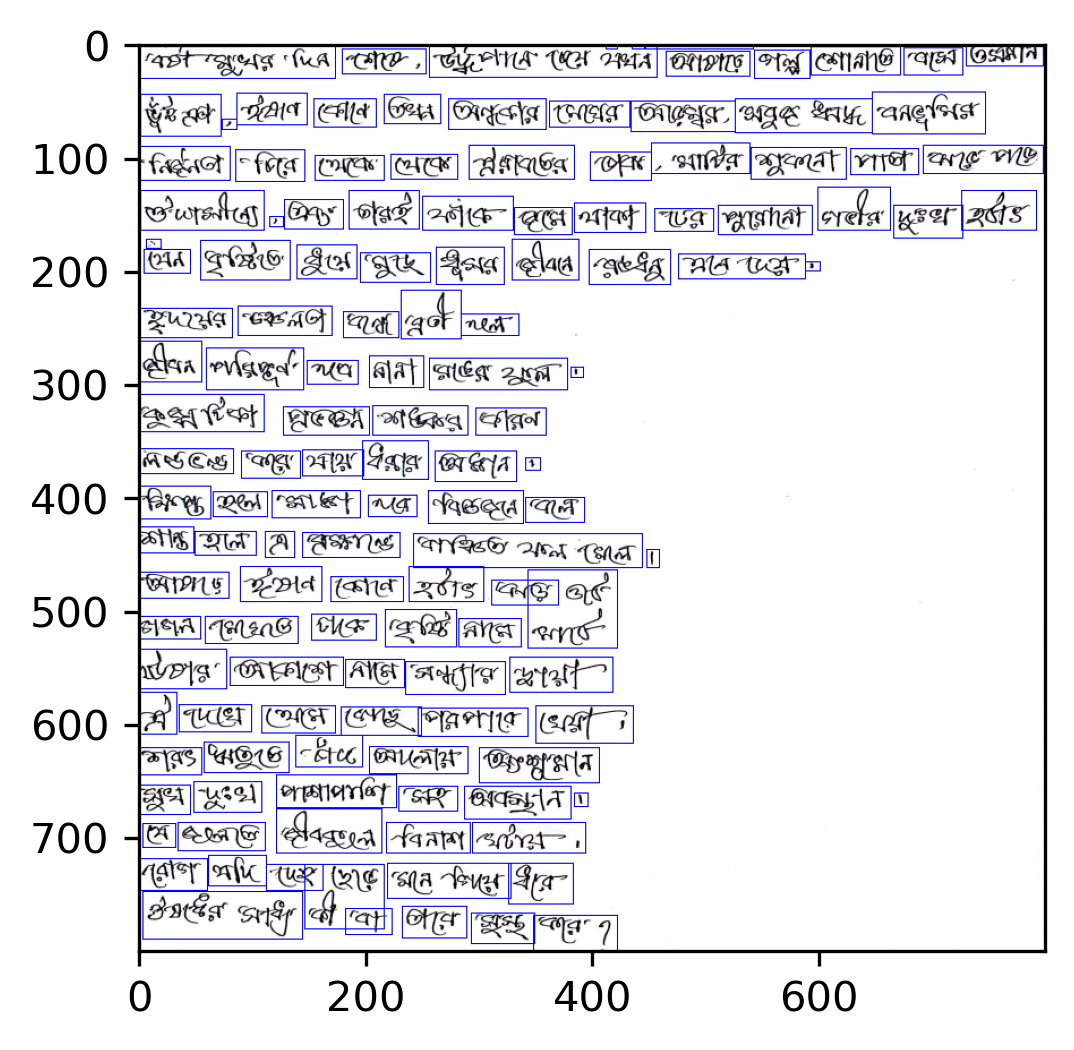

In [11]:
local_img=re_sized_img.copy()
cnts = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(local_img, (x, y), (x + w, y + h), (0,0,255), 1)

plt.imshow(local_img)

In [12]:
labels=['বর্ষামুখর', 'দিন', 'শেষে', ',', 'ঊর্দ্ধপানে', 'চেয়ে', 'যখন', 'আষাঢ়ে', 'গল্প', 'শোনাতে', 'বসে', 'ওসমান', 'ভুঁইঞা', ',', 'ঈষান', 'কোণে', 'তখন', 'অন্ধকার', 'মেঘের', 'আড়ম্বর', ',', 'সবুজে', 'ঋদ্ধ', 'বনভূমির', 'নির্জনতা', 'চিরে', 'থেকে', 'হতে', 'ঐরাবতের', 'ডাক', ',', 'মাটির', 'উপর', 'শুকনো', 'পাতা', 'ঝরে', 'পড়ে', 'ঔদাসীন্যে', ',', 'এবং', 'তারই', 'ফাঁকে', 'জমে', 'থাকা', 'ঢের', 'পুরোনো', 'গভীর', 'দুঃখ', 'হঠাৎ', 'যেন', 'বৃষ্টিতে', 'ধুয়ে', 'মুছে', 'ধূসর', 'জীবনে', 'রঙধনু', 'এনে', 'দেয়', '।', 'হৃদয়ের', 'চঞ্চলতা', 'বন্ধে', 'ব্রতী', 'হলে', 'জীবন', 'পরিপূর্ণ', 'হবে', 'নানা', 'রঙের', 'ফুলে', '।', 'কুজ্ঝটিকা', 'প্রভঞ্জন', 'শঙ্কার', 'কারণ', 'লণ্ডভণ্ড', 'হয়ে', 'যায়', 'ধরার', 'অঙ্গন', '।', 'ক্ষিপ্ত', 'হলে', 'সাঙ্গ', 'হবে', 'বিজ্ঞজনে', 'বলে', 'শান্ত', 'ভাবে', 'এ', 'ব্রহ্মাণ্ডে', 'বাঞ্ছিতফল', 'মেলে', '।', 'শ্রাবনে', 'উত্তর', 'পূর্ব', 'দিকে', '', 'হঠাৎ', 'ঝড়', 'উঠে', 'গগন', 'মেঘেতে', 'ঢাকে', 'বৃষ্টি', 'নামে', 'মাঠে', 'ঊষার', 'আকাশে', 'সন্ধ্যার', 'ছায়া', 'ঐ', 'দেখো', 'থেমে', 'গেছে', 'পারাপারে', 'খেয়া', '।', 'শরৎ', 'ঋতুতে', 'চাঁদ', 'আলোয়', 'অংশুমান', 'সুখ', 'দুঃখ', 'পাশাপাশি', 'সহ', 'অবস্থান', '।', 'যে', 'জলেতে', 'ঈশ্বর', 'তৃষ্ণা', 'মেটায়', 'সেই', 'জলেতে', 'জীবকুলে', 'বিনাশ', 'ঘটায়', '।', 'রোগ', 'যদি', 'দেহ', 'ছেড়ে', 'মনে', 'গিয়ে', 'ধরে', 'ঔষধের', 'সাধ্য', 'কী', 'বা', 'তারে', 'সুস্থ', 'করে', '?']


In [15]:
from jupyter_bbox_widget import bbox


box_list=[]
for idx,c in enumerate(cnts):
    x,y,w,h = cv2.boundingRect(c)
    # print({'x':x,'y':y,'width':w,'height':h,'label':labels[idx] if idx<len(labels) else " "})
    box_list.append({'x':x,'y':y,'width':w,'height':h})
    # box_list.append({
    #   'label':None,
    #   'points': [
    #     [x,y],
    #     [x+w,y+h]],
    #   "group_id": None,
    #   "shape_type": "rectangle",
    #   "flags": {}})

# box_list=[x for x in box_list if int(x['points'][1][0])>50]
# box_list=sorted(box_list,key=lambda a: (a['points'][0][0],a['points'][0][1]))

box_list=[x for x in box_list if (int(x['width']) *int(x['height']))>100]
# box_list=[x for x in box_list if int(x['height'])>100]
box_list=sorted(box_list,key=lambda a: (a['x'],a['y']))

for idx,val in enumerate(box_list):
    val['label']=idx

widget = BBoxWidget(
    image='./images/arif.jpg',
    # classes=labels,
    bboxes=box_list,
    hide_buttons=True
)
print(box_list[:10])
widget
# # print(box_list)
# # print(box_list[0]['x'])
# json_list=[]
# for i in box_list:
#     json_list.append({"label": None,
#       "points": [
#         [
#           i['x'],
#           i['y']
#         ],
#         [
#           i['x']+i['width'],
#           i['y']+i['height']
#         ]
#       ],
#       "group_id": None,
#       "shape_type": "rectangle",
#       "flags": {}})

# import json
# y=json.dumps(json_list)
# print(y)

[{'x': 0, 'y': 0, 'width': 173, 'height': 29, 'label': 0}, {'x': 0, 'y': 89, 'width': 80, 'height': 30, 'label': 1}, {'x': 0, 'y': 232, 'width': 82, 'height': 26, 'label': 2}, {'x': 0, 'y': 261, 'width': 55, 'height': 36, 'label': 3}, {'x': 0, 'y': 308, 'width': 110, 'height': 33, 'label': 4}, {'x': 0, 'y': 356, 'width': 83, 'height': 22, 'label': 5}, {'x': 0, 'y': 389, 'width': 63, 'height': 29, 'label': 6}, {'x': 0, 'y': 425, 'width': 48, 'height': 23, 'label': 7}, {'x': 0, 'y': 465, 'width': 79, 'height': 23, 'label': 8}, {'x': 0, 'y': 504, 'width': 54, 'height': 20, 'label': 9}]


BBoxWidget(bboxes=[{'x': 0, 'y': 0, 'width': 173, 'height': 29, 'label': 0}, {'x': 0, 'y': 89, 'width': 80, 'h…

In [16]:

box_list

[{'x': 0, 'y': 0, 'width': 173, 'height': 29, 'label': 0},
 {'x': 0, 'y': 89, 'width': 80, 'height': 30, 'label': 1},
 {'x': 0, 'y': 232, 'width': 82, 'height': 26, 'label': 2},
 {'x': 0, 'y': 261, 'width': 55, 'height': 36, 'label': 3},
 {'x': 0, 'y': 308, 'width': 110, 'height': 33, 'label': 4},
 {'x': 0, 'y': 356, 'width': 83, 'height': 22, 'label': 5},
 {'x': 0, 'y': 389, 'width': 63, 'height': 29, 'label': 6},
 {'x': 0, 'y': 425, 'width': 48, 'height': 23, 'label': 7},
 {'x': 0, 'y': 465, 'width': 79, 'height': 23, 'label': 8},
 {'x': 0, 'y': 504, 'width': 54, 'height': 20, 'label': 9},
 {'x': 0, 'y': 533, 'width': 77, 'height': 35, 'label': 10},
 {'x': 0, 'y': 571, 'width': 33, 'height': 37, 'label': 11},
 {'x': 0, 'y': 620, 'width': 55, 'height': 24, 'label': 12},
 {'x': 0, 'y': 653, 'width': 45, 'height': 26, 'label': 13},
 {'x': 0, 'y': 718, 'width': 60, 'height': 28, 'label': 14},
 {'x': 1, 'y': 43, 'width': 71, 'height': 37, 'label': 15},
 {'x': 1, 'y': 128, 'width': 109, 'h

0 356 83 22


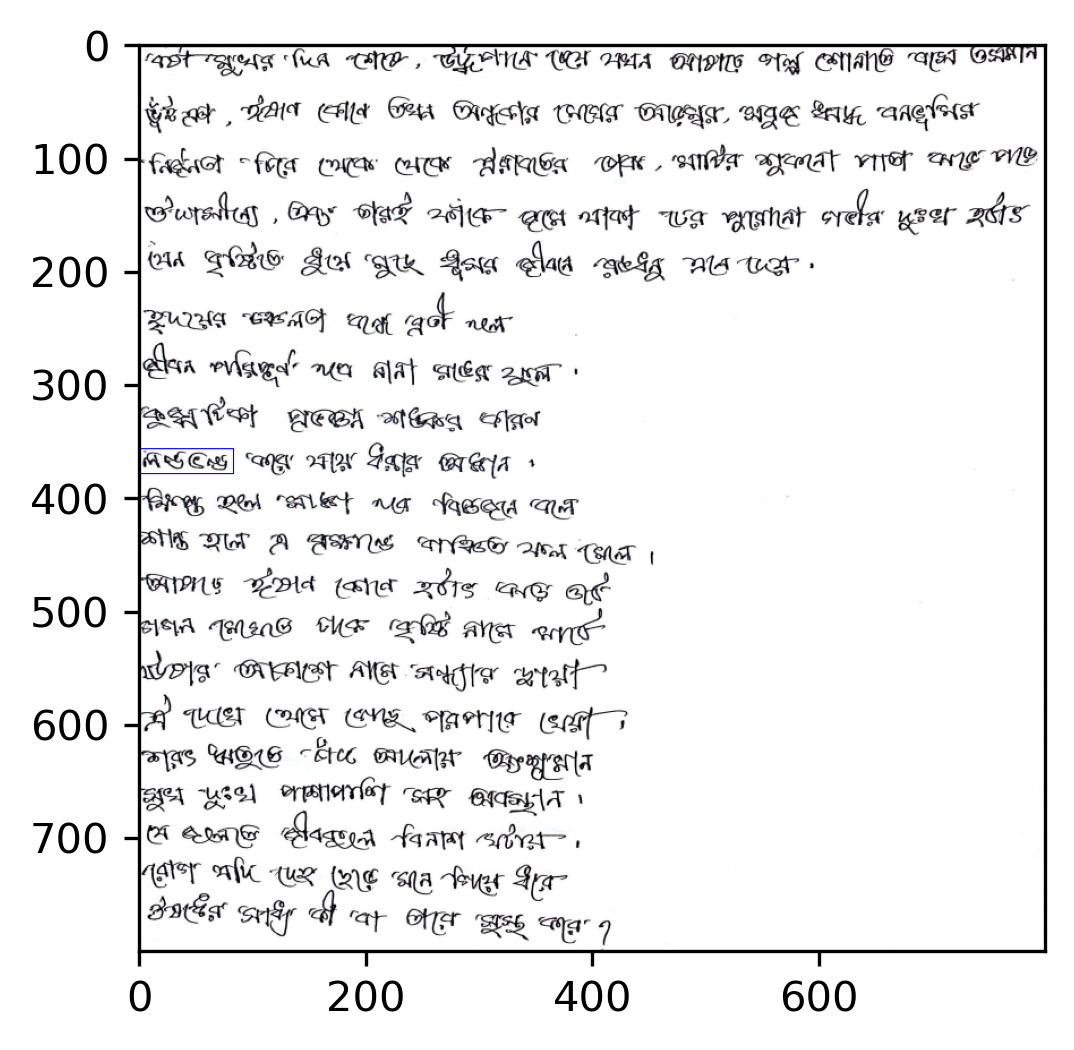

In [20]:
# for val in widget.bboxes:
#     plt.imshow()
local_img=re_sized_img.copy()
x,y,w,h,label=box_list[5].values()
print(x,y,w,h)
cv2.rectangle(local_img, (x, y), (x + w, y + h), (0,0,255), 1)

plt.imshow(local_img)
